In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
import yfinance as yf

In [3]:
#Download Tata motors data from yahoo finance
df = yf.download('INFY.NS')

[*********************100%***********************]  1 of 1 completed


In [4]:
#first 5 samples
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.519068,204800
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.516968,204800
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.520468,102400
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.517032,307200
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.510924,51200


In [5]:
# to check dates in index
df.index

DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-08', '1996-01-09', '1996-01-10',
               '1996-01-11', '1996-01-12',
               ...
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-26'],
              dtype='datetime64[ns]', name='Date', length=6912, freq=None)

In [6]:
# to check features or columns 
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-20,1294.000000,1305.000000,1291.099976,1303.400024,1303.400024,4009180
2023-06-21,1299.949951,1303.800049,1295.000000,1299.349976,1299.349976,4041529
2023-06-22,1289.400024,1289.400024,1273.500000,1281.550049,1281.550049,6676607
2023-06-23,1276.449951,1279.349976,1263.349976,1265.000000,1265.000000,7239467
2023-06-26,1270.250000,1274.000000,1262.250000,1270.349976,1270.349976,3401629


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6912 entries, 1996-01-01 to 2023-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6912 non-null   float64
 1   High       6912 non-null   float64
 2   Low        6912 non-null   float64
 3   Close      6912 non-null   float64
 4   Adj Close  6912 non-null   float64
 5   Volume     6912 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 378.0 KB


In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

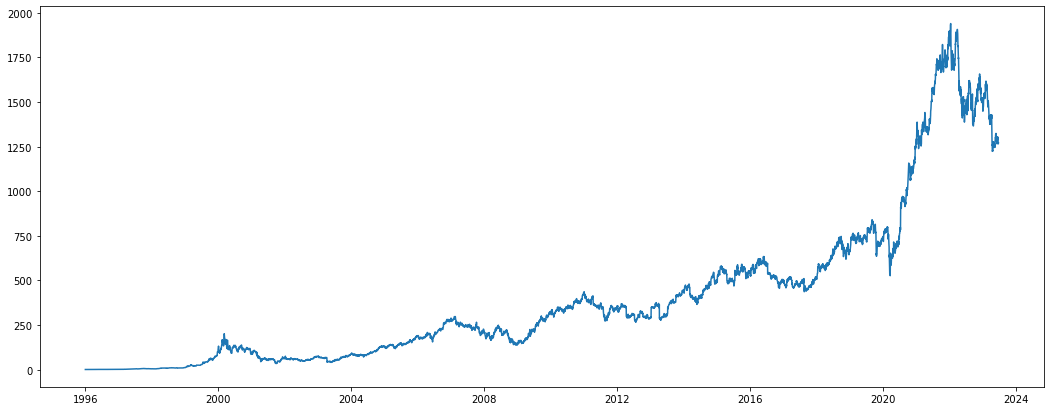

In [11]:
# plot a graph of tata motors 
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [12]:
# check open price for first day and close price for last day
print("Starting price: ",df.iloc[0][0])
print("Ending price: ", df.iloc[-1][3])

Starting price:  0.7949209809303284
Ending price:  1270.3499755859375


In [13]:
# check start date and end date in our dataset
print("Starting date: ",df.index[0])
print("Ending date: ", df.index[-1])

Starting date:  1996-01-01 00:00:00
Ending date:  2023-06-26 00:00:00


In [14]:
# drop all columns except 'close ' columns as we are going to do prediction only on closing price
df.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [15]:
actual_prices = df['Close'].values

In [16]:
actual_prices

array([7.96679020e-01, 7.93456972e-01, 7.98828006e-01, ...,
       1.28155005e+03, 1.26500000e+03, 1.27034998e+03])

In [17]:
actual_returns = (actual_prices[1:] - actual_prices[:-1]) / actual_prices[:-1]

In [18]:
actual_returns

array([-0.00404435,  0.00676916, -0.00660217, ..., -0.0136991 ,
       -0.01291409,  0.00422923])

In [19]:
actual_returns.cumsum()

array([-4.04434936e-03,  2.72480680e-03, -3.87736256e-03, ...,
        9.41912459e+00,  9.40621050e+00,  9.41043973e+00])

In [20]:
df.head()

,Close
Date,
1996-01-01,0.796679
1996-01-02,0.793457
1996-01-03,0.798828
1996-01-04,0.793554
1996-01-05,0.784179


In [21]:
# Resample the data to weekly frequency.we can use mean or last
df = df.resample('W').mean()

In [22]:
df.head()

,Close
Date,
1996-01-07,0.793339
1996-01-14,0.784082
1996-01-21,0.775566
1996-01-28,0.771191
1996-02-04,0.793437


In [23]:
df.tail()

,Close
Date,
2023-06-04,1315.010010
2023-06-11,1284.239990
2023-06-18,1295.130005
2023-06-25,1288.660010
2023-07-02,1270.349976


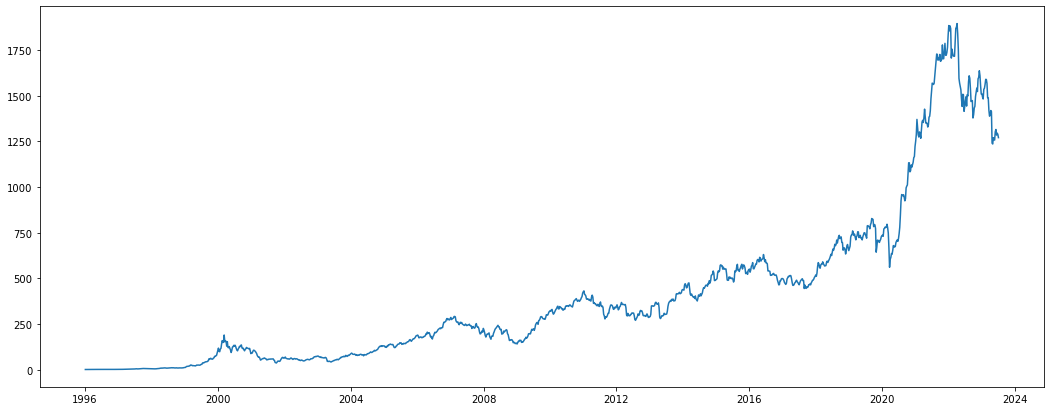

In [24]:
# plot a chart for tata motors
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [25]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
# Preprocess the data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [26]:
df1

array([[1.16934916e-05],
       [6.80574273e-06],
       [2.30993319e-06],
       ...,
       [6.83371150e-01],
       [6.79955244e-01],
       [6.70288258e-01]])

In [27]:
# Split data into training and testing sets
train_size=int(len(df1)*0.7)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [28]:
train_size,test_size

(1004, 431)

In [29]:
train_data

array([[1.16934916e-05],
       [6.80574273e-06],
       [2.30993319e-06],
       ...,
       [2.90207727e-01],
       [2.95899145e-01],
       [2.90301442e-01]])

In [30]:
# convert an array of values into a dataset matrix
#function to create new dataset which is required by LSTM.giving sequence of data to our LSTM model
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), numpy.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
X_train

array([[1.16934916e-05, 6.80574273e-06, 2.30993319e-06, ...,
        4.58898252e-03, 4.63090982e-03, 4.56375985e-03],
       [6.80574273e-06, 2.30993319e-06, 0.00000000e+00, ...,
        4.63090982e-03, 4.56375985e-03, 4.53140172e-03],
       [2.30993319e-06, 0.00000000e+00, 1.17450188e-05, ...,
        4.56375985e-03, 4.53140172e-03, 4.44983595e-03],
       ...,
       [1.57048008e-01, 1.54781736e-01, 1.62253542e-01, ...,
        3.01041494e-01, 3.02611187e-01, 2.99998777e-01],
       [1.54781736e-01, 1.62253542e-01, 1.56044225e-01, ...,
        3.02611187e-01, 2.99998777e-01, 3.00260110e-01],
       [1.62253542e-01, 1.56044225e-01, 1.56344502e-01, ...,
        2.99998777e-01, 3.00260110e-01, 2.90207727e-01]])

In [33]:
y_train

array([0.0045314 , 0.00444984, 0.00449036, 0.00491807, 0.00495804,
       0.0056322 , 0.00568914, 0.00596632, 0.00725539, 0.00874802,
       0.00913378, 0.00913774, 0.00968309, 0.01011156, 0.01037913,
       0.0127778 , 0.01284384, 0.01238814, 0.01096793, 0.0113606 ,
       0.01094891, 0.01081969, 0.01081362, 0.01034102, 0.01174849,
       0.01283481, 0.01265332, 0.0128014 , 0.01284846, 0.01270814,
       0.01238926, 0.01389069, 0.01471988, 0.0150463 , 0.01855671,
       0.01982101, 0.01897867, 0.02062904, 0.02127291, 0.02236937,
       0.02255465, 0.02238076, 0.02394818, 0.02479861, 0.03072205,
       0.02905815, 0.03151894, 0.03242468, 0.03049527, 0.02983198,
       0.03001743, 0.03268598, 0.03385702, 0.03810332, 0.0377834 ,
       0.03971055, 0.04065048, 0.04786998, 0.05521243, 0.06177751,
       0.05218981, 0.05145154, 0.05907278, 0.06120368, 0.07426453,
       0.08357818, 0.07810066, 0.07890366, 0.09971184, 0.08028997,
       0.08349675, 0.08079937, 0.0674794 , 0.08049224, 0.06366

In [34]:
X_test

array([[0.2908646 , 0.28963357, 0.2908426 , ..., 0.30899787, 0.30536945,
        0.2951666 ],
       [0.28963357, 0.2908426 , 0.27755514, ..., 0.30536945, 0.2951666 ,
        0.29281256],
       [0.2908426 , 0.27755514, 0.25858913, ..., 0.2951666 , 0.29281256,
        0.30224656],
       ...,
       [0.48740253, 0.50568583, 0.50360566, ..., 0.66318192, 0.6873467 ,
        0.69386702],
       [0.50568583, 0.50360566, 0.50216432, ..., 0.6873467 , 0.69386702,
        0.67762165],
       [0.50360566, 0.50216432, 0.5052001 , ..., 0.69386702, 0.67762165,
        0.68337115]])

In [35]:
print(X_train.shape) 

(853, 150)


In [36]:
print(y_train.shape)

(853,)


In [37]:
print(X_test.shape)

(280, 150)


In [38]:
 print(ytest.shape)

(280,)


In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
X_train.shape

(853, 150, 1)

In [41]:
X_train

array([[[1.16934916e-05],
        [6.80574273e-06],
        [2.30993319e-06],
        ...,
        [4.58898252e-03],
        [4.63090982e-03],
        [4.56375985e-03]],

       [[6.80574273e-06],
        [2.30993319e-06],
        [0.00000000e+00],
        ...,
        [4.63090982e-03],
        [4.56375985e-03],
        [4.53140172e-03]],

       [[2.30993319e-06],
        [0.00000000e+00],
        [1.17450188e-05],
        ...,
        [4.56375985e-03],
        [4.53140172e-03],
        [4.44983595e-03]],

       ...,

       [[1.57048008e-01],
        [1.54781736e-01],
        [1.62253542e-01],
        ...,
        [3.01041494e-01],
        [3.02611187e-01],
        [2.99998777e-01]],

       [[1.54781736e-01],
        [1.62253542e-01],
        [1.56044225e-01],
        ...,
        [3.02611187e-01],
        [2.99998777e-01],
        [3.00260110e-01]],

       [[1.62253542e-01],
        [1.56044225e-01],
        [1.56344502e-01],
        ...,
        [2.99998777e-01],
        [3.0026

In [42]:
### Create the Stacked LSTM model
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model

In [43]:
#model=Sequential()
#model.add(LSTM(300, input_shape = (time_step , 1), return_sequences=True))
#model.add(Dropout(0.5))
#model.add(LSTM(200, input_shape=(time_step , 1), return_sequences=False))
#model.add(Dropout(0.5))
#model.add(Dense(100,kernel_initializer='uniform',activation='relu'))        
#model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
#model.compile(loss='mse',optimizer='adam')

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 6s 463ms/step - loss: 2.6476e-04 - val_loss: 0.0056
Epoch 2/100
14/14 [==============================] - 6s 456ms/step - loss: 2.4545e-04 - val_loss: 0.0061
Epoch 3/100
14/14 [==============================] - 6s 460ms/step - loss: 2.3912e-04 - val_loss: 0.0059
Epoch 4/100
14/14 [==============================] - 6s 449ms/step - loss: 2.2756e-04 - val_loss: 0.0042
Epoch 5/100
14/14 [==============================] - 6s 457ms/step - loss: 2.2697e-04 - val_loss: 0.0046
Epoch 6/100
14/14 [==============================] - 6s 441ms/step - loss: 2.3326e-04 - val_loss: 0.0042
Epoch 7/100
14/14 [==============================] - 6s 448ms/step - loss: 2.1495e-04 - val_loss: 0.0036
Epoch 8/100
14/14 [==============================] - 6s 448ms/step - loss: 1.9820e-04 - val_loss: 0.0035
Epoch 9/100
14/14 [==============================] - 6s 452ms/step - loss: 1.9034e-04 - val_loss: 0.0033
Epoch 10/100
14/14 [==============================] - 6

14/14 [==============================] - 6s 441ms/step - loss: 7.3860e-05 - val_loss: 0.0014
Epoch 79/100
14/14 [==============================] - 6s 443ms/step - loss: 7.7294e-05 - val_loss: 8.4850e-04
Epoch 80/100
14/14 [==============================] - 6s 433ms/step - loss: 6.1158e-05 - val_loss: 0.0011
Epoch 81/100
14/14 [==============================] - 6s 448ms/step - loss: 6.9724e-05 - val_loss: 8.1681e-04
Epoch 82/100
14/14 [==============================] - 6s 433ms/step - loss: 6.5357e-05 - val_loss: 8.0648e-04
Epoch 83/100
14/14 [==============================] - 6s 426ms/step - loss: 6.2396e-05 - val_loss: 8.0928e-04
Epoch 84/100
14/14 [==============================] - 6s 424ms/step - loss: 5.5884e-05 - val_loss: 8.2903e-04
Epoch 85/100
14/14 [==============================] - 6s 423ms/step - loss: 5.7805e-05 - val_loss: 7.8951e-04
Epoch 86/100
14/14 [==============================] - 6s 435ms/step - loss: 5.8257e-05 - val_loss: 8.7364e-04
Epoch 87/100
14/14 [===========

In [47]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 1s 80ms/step


In [48]:
train_predict

array([[0.00658149],
       [0.0066095 ],
       [0.00659512],
       [0.00656499],
       [0.00662144],
       [0.0067371 ],
       [0.00699051],
       [0.00729081],
       [0.00759447],
       [0.00808942],
       [0.00891824],
       [0.00985766],
       [0.01062489],
       [0.0112034 ],
       [0.01164437],
       [0.0119817 ],
       [0.01268661],
       [0.01353845],
       [0.01416536],
       [0.01419567],
       [0.01392527],
       [0.01352249],
       [0.01313982],
       [0.01287955],
       [0.01266945],
       [0.01281499],
       [0.01340363],
       [0.01409131],
       [0.014665  ],
       [0.01503265],
       [0.01516503],
       [0.01506654],
       [0.01516552],
       [0.01558481],
       [0.01617079],
       [0.01741924],
       [0.01910673],
       [0.02046215],
       [0.02156853],
       [0.02245528],
       [0.02326591],
       [0.02392314],
       [0.02430973],
       [0.02478364],
       [0.02544835],
       [0.02734781],
       [0.02933118],
       [0.031

In [49]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [50]:
train_predict

array([[ 13.237054],
       [ 13.290096],
       [ 13.262865],
       [ 13.205803],
       [ 13.312713],
       [ 13.531796],
       [ 14.011774],
       [ 14.580561],
       [ 15.155715],
       [ 16.093195],
       [ 17.663048],
       [ 19.44237 ],
       [ 20.895576],
       [ 21.991316],
       [ 22.826551],
       [ 23.465467],
       [ 24.800625],
       [ 26.414083],
       [ 27.601498],
       [ 27.658901],
       [ 27.146759],
       [ 26.383856],
       [ 25.659037],
       [ 25.166077],
       [ 24.768127],
       [ 25.043798],
       [ 26.158726],
       [ 27.461248],
       [ 28.547865],
       [ 29.244207],
       [ 29.494951],
       [ 29.3084  ],
       [ 29.495888],
       [ 30.290047],
       [ 31.399942],
       [ 33.7646  ],
       [ 36.960842],
       [ 39.528122],
       [ 41.62369 ],
       [ 43.303253],
       [ 44.838657],
       [ 46.083508],
       [ 46.81573 ],
       [ 47.713352],
       [ 48.97238 ],
       [ 52.570095],
       [ 56.326756],
       [ 60.0

In [51]:
test_predict

array([[ 588.8323 ],
       [ 578.7166 ],
       [ 574.85956],
       [ 577.7166 ],
       [ 582.46356],
       [ 591.13605],
       [ 595.51196],
       [ 593.7396 ],
       [ 588.0824 ],
       [ 583.39453],
       [ 581.7164 ],
       [ 588.18994],
       [ 598.9827 ],
       [ 604.9661 ],
       [ 608.73193],
       [ 612.6608 ],
       [ 618.30853],
       [ 626.6149 ],
       [ 636.69714],
       [ 641.01965],
       [ 646.97125],
       [ 658.5163 ],
       [ 665.6586 ],
       [ 671.9759 ],
       [ 683.8483 ],
       [ 691.0799 ],
       [ 695.75037],
       [ 706.8878 ],
       [ 710.68207],
       [ 716.2308 ],
       [ 727.9537 ],
       [ 740.546  ],
       [ 741.55005],
       [ 739.4208 ],
       [ 738.796  ],
       [ 727.8866 ],
       [ 716.54596],
       [ 694.3274 ],
       [ 680.45654],
       [ 677.9653 ],
       [ 678.3454 ],
       [ 670.37274],
       [ 668.6109 ],
       [ 680.845  ],
       [ 697.0339 ],
       [ 701.7514 ],
       [ 691.7344 ],
       [ 683.

In [52]:
ytest

array([0.29281256, 0.30224656, 0.30463228, 0.30430033, 0.3113407 ,
       0.30621683, 0.30238296, 0.29928206, 0.29963051, 0.30030101,
       0.3091998 , 0.31321496, 0.30940044, 0.31319648, 0.31676814,
       0.32140627, 0.32746726, 0.33308741, 0.32938641, 0.33839077,
       0.3481475 , 0.34448081, 0.35058668, 0.3619616 , 0.35796758,
       0.36160259, 0.37424397, 0.36546331, 0.37484121, 0.38438412,
       0.38787526, 0.37841815, 0.38153576, 0.383282  , 0.36756063,
       0.3669152 , 0.34484774, 0.35012736, 0.35167033, 0.34702823,
       0.33391763, 0.34332195, 0.35737098, 0.36135181, 0.35323177,
       0.34366511, 0.35050221, 0.35660544, 0.38285039, 0.38863156,
       0.38905394, 0.40073243, 0.39493674, 0.3875862 , 0.39121858,
       0.38240426, 0.3748201 , 0.38427852, 0.38639037, 0.3982035 ,
       0.39778113, 0.38124714, 0.38524205, 0.38777626, 0.37974597,
       0.38042704, 0.37462476, 0.38345226, 0.38957793, 0.39506741,
       0.39532084, 0.38979308, 0.38546907, 0.37957703, 0.41525

In [53]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



253.0077646443726

In [54]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1211.6845481672597

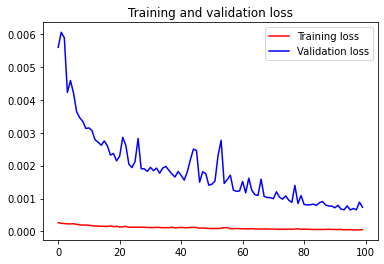

<Figure size 432x288 with 0 Axes>

In [55]:
### plot a graph for training and validation loss to visualize the results of model training

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.figure()


plt.show()

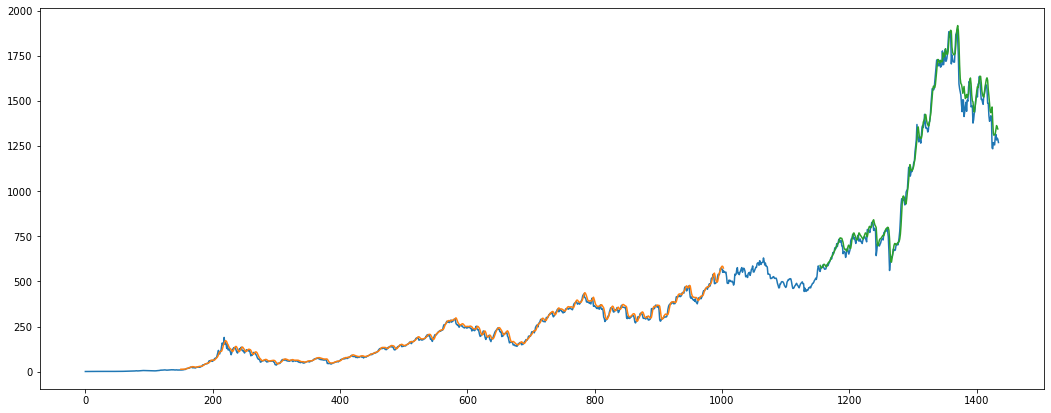

In [56]:
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)  ## to take same shape and sata type of df1
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt1 = plt.figure(figsize=(18,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
ytest

array([0.29281256, 0.30224656, 0.30463228, 0.30430033, 0.3113407 ,
       0.30621683, 0.30238296, 0.29928206, 0.29963051, 0.30030101,
       0.3091998 , 0.31321496, 0.30940044, 0.31319648, 0.31676814,
       0.32140627, 0.32746726, 0.33308741, 0.32938641, 0.33839077,
       0.3481475 , 0.34448081, 0.35058668, 0.3619616 , 0.35796758,
       0.36160259, 0.37424397, 0.36546331, 0.37484121, 0.38438412,
       0.38787526, 0.37841815, 0.38153576, 0.383282  , 0.36756063,
       0.3669152 , 0.34484774, 0.35012736, 0.35167033, 0.34702823,
       0.33391763, 0.34332195, 0.35737098, 0.36135181, 0.35323177,
       0.34366511, 0.35050221, 0.35660544, 0.38285039, 0.38863156,
       0.38905394, 0.40073243, 0.39493674, 0.3875862 , 0.39121858,
       0.38240426, 0.3748201 , 0.38427852, 0.38639037, 0.3982035 ,
       0.39778113, 0.38124714, 0.38524205, 0.38777626, 0.37974597,
       0.38042704, 0.37462476, 0.38345226, 0.38957793, 0.39506741,
       0.39532084, 0.38979308, 0.38546907, 0.37957703, 0.41525

In [58]:
test_predict

array([[ 588.8323 ],
       [ 578.7166 ],
       [ 574.85956],
       [ 577.7166 ],
       [ 582.46356],
       [ 591.13605],
       [ 595.51196],
       [ 593.7396 ],
       [ 588.0824 ],
       [ 583.39453],
       [ 581.7164 ],
       [ 588.18994],
       [ 598.9827 ],
       [ 604.9661 ],
       [ 608.73193],
       [ 612.6608 ],
       [ 618.30853],
       [ 626.6149 ],
       [ 636.69714],
       [ 641.01965],
       [ 646.97125],
       [ 658.5163 ],
       [ 665.6586 ],
       [ 671.9759 ],
       [ 683.8483 ],
       [ 691.0799 ],
       [ 695.75037],
       [ 706.8878 ],
       [ 710.68207],
       [ 716.2308 ],
       [ 727.9537 ],
       [ 740.546  ],
       [ 741.55005],
       [ 739.4208 ],
       [ 738.796  ],
       [ 727.8866 ],
       [ 716.54596],
       [ 694.3274 ],
       [ 680.45654],
       [ 677.9653 ],
       [ 678.3454 ],
       [ 670.37274],
       [ 668.6109 ],
       [ 680.845  ],
       [ 697.0339 ],
       [ 701.7514 ],
       [ 691.7344 ],
       [ 683.

In [59]:
test_predict1 = test_predict.flatten()

In [60]:
test_predict1

array([ 588.8323 ,  578.7166 ,  574.85956,  577.7166 ,  582.46356,
        591.13605,  595.51196,  593.7396 ,  588.0824 ,  583.39453,
        581.7164 ,  588.18994,  598.9827 ,  604.9661 ,  608.73193,
        612.6608 ,  618.30853,  626.6149 ,  636.69714,  641.01965,
        646.97125,  658.5163 ,  665.6586 ,  671.9759 ,  683.8483 ,
        691.0799 ,  695.75037,  706.8878 ,  710.68207,  716.2308 ,
        727.9537 ,  740.546  ,  741.55005,  739.4208 ,  738.796  ,
        727.8866 ,  716.54596,  694.3274 ,  680.45654,  677.9653 ,
        678.3454 ,  670.37274,  668.6109 ,  680.845  ,  697.0339 ,
        701.7514 ,  691.7344 ,  683.71027,  684.13715,  706.48553,
        733.6987 ,  751.4499 ,  765.9848 ,  769.1441 ,  760.28064,
        752.69775,  742.8419 ,  730.71674,  730.3442 ,  737.87115,
        754.9627 ,  769.4587 ,  764.5853 ,  756.39166,  752.66077,
        746.30695,  741.5781 ,  735.33704,  737.50867,  747.2328 ,
        760.1175 ,  769.00275,  768.07574,  759.8624 ,  747.49

In [61]:
ytest1 = ytest.flatten()

In [62]:
ytest1 = ytest1.reshape(1,-1)

In [63]:
ytest1

array([[0.29281256, 0.30224656, 0.30463228, 0.30430033, 0.3113407 ,
        0.30621683, 0.30238296, 0.29928206, 0.29963051, 0.30030101,
        0.3091998 , 0.31321496, 0.30940044, 0.31319648, 0.31676814,
        0.32140627, 0.32746726, 0.33308741, 0.32938641, 0.33839077,
        0.3481475 , 0.34448081, 0.35058668, 0.3619616 , 0.35796758,
        0.36160259, 0.37424397, 0.36546331, 0.37484121, 0.38438412,
        0.38787526, 0.37841815, 0.38153576, 0.383282  , 0.36756063,
        0.3669152 , 0.34484774, 0.35012736, 0.35167033, 0.34702823,
        0.33391763, 0.34332195, 0.35737098, 0.36135181, 0.35323177,
        0.34366511, 0.35050221, 0.35660544, 0.38285039, 0.38863156,
        0.38905394, 0.40073243, 0.39493674, 0.3875862 , 0.39121858,
        0.38240426, 0.3748201 , 0.38427852, 0.38639037, 0.3982035 ,
        0.39778113, 0.38124714, 0.38524205, 0.38777626, 0.37974597,
        0.38042704, 0.37462476, 0.38345226, 0.38957793, 0.39506741,
        0.39532084, 0.38979308, 0.38546907, 0.37

In [64]:
ytest2 = scaler.inverse_transform(ytest1)

In [65]:
ytest2

array([[ 555.3812561 ,  573.25      ,  577.76873779,  577.14000244,
         590.47501221,  580.77000732,  573.50834147,  567.63499756,
         568.29499512,  569.56497803,  586.41998291,  594.02500916,
         586.8       ,  593.99000244,  600.75500488,  609.54000244,
         621.01999512,  631.66500244,  624.65500488,  641.70998535,
         660.18999023,  653.24499512,  664.80999756,  686.35499268,
         678.79000244,  685.67498779,  709.61875916,  692.98750305,
         710.74998779,  728.82501221,  735.4375    ,  717.5249939 ,
         723.42999268,  726.73750305,  696.95999756,  695.73748779,
         653.93999023,  663.94000244,  666.86250305,  658.07000732,
         633.23750305,  651.05001221,  677.65999756,  685.2       ,
         669.81999512,  651.69999695,  664.65      ,  676.20999756,
         725.91999512,  736.86999512,  737.67000732,  759.79000244,
         748.8125    ,  734.89000244,  741.77000732,  725.07499695,
         710.70999756,  728.625     ,  732.625  

In [66]:
ytest2 = ytest2.flatten()

In [67]:
# creating dataframe to calculate further analysis like profit and loss

df1 = pd.DataFrame({'actual':ytest2,'predicted':test_predict1})

In [68]:
df1.head()

,actual,predicted
0,555.381256,588.832275
1,573.250000,578.716614
2,577.768738,574.859558
3,577.140002,577.716614
4,590.475012,582.463562


In [69]:
# Generate buy and sell signals as 1 and 0 respectively
system_signals = []
#sell_signals = []
for i in range(len(test_predict)):
    if i == 0:
        continue
    if test_predict[i] > test_predict[i - 1]:
        system_signals.append(1)
    else:
        system_signals.append(0)


In [70]:
system_signals

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [71]:
len(system_signals)

279

In [72]:
# inserting any value at 0th index position as previous signals generated from 1st index.to match length of our dataset

system_signals.insert(0,'start')

In [73]:
system_signals

['start',
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0

In [74]:
signals1 = np.array(system_signals)

In [75]:
signals1

array(['start', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1',
       '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0'

In [76]:
signals1.flatten()

array(['start', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1',
       '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0'

In [77]:
# adding signals column in our dataframe(here created new dataframe)

df2 = pd.DataFrame({'actual':ytest2,'predicted':test_predict1,'signals':signals1})

In [78]:
df2.head()

,actual,predicted,signals
0,555.381256,588.832275,start
1,573.250000,578.716614,0
2,577.768738,574.859558,0
3,577.140002,577.716614,1
4,590.475012,582.463562,1


In [79]:
df2.tail(10)

,actual,predicted,signals
270,1240.119995,1467.154419,1
271,1235.550024,1385.738647,0
272,1269.812500,1319.829956,0
273,1260.169971,1309.902588,0
274,1256.890015,1315.019287,1
275,1302.660010,1319.600342,1
276,1315.010010,1343.216919,1
277,1284.239990,1364.254395,1
278,1295.130005,1355.914673,0
279,1288.660010,1345.489014,0


In [80]:
df2.shape

(280, 3)

In [81]:
# collecting all positions where buy signal triggered.here we collect buy and sell signals and aim is to do sum of both to  
# calculate profit or loss made by our strategy

buy_count = []
for i in range(279):
    if df2['signals'][i]=='0' and df2['signals'][i+1]=='1':
        buy_count.append(df2['actual'][i+1])
    else:
        continue

In [82]:
# collecting all positions where sell signal triggered for summation

sell_count = []
for i in range(279):
    if df2['signals'][i]=='1' and df2['signals'][i+1]=='0':
        sell_count.append(df2['actual'][i+1]) 
    else:
        continue

In [83]:
sell_count

[567.6349975585938,
 726.7375030517578,
 651.0500122070313,
 664.65,
 741.7700073242188,
 730.45,
 730.8799926757813,
 793.5500122070313,
 794.5625,
 770.3199951171875,
 748.0699951171875,
 673.3199951171875,
 943.7199951171875,
 1089.110009765625,
 1273.65,
 1312.4199951171875,
 1349.7000122070312,
 1568.0999755859375,
 1705.4750061035156,
 1691.9900146484374,
 1702.2875061035156,
 1721.5400146484376,
 1705.9375,
 1752.5166829427083,
 1438.9699951171874,
 1505.7100341796875,
 1467.9749755859375,
 1592.580029296875,
 1552.289990234375,
 1488.8700439453125,
 1235.5500244140626,
 1295.1300048828125]

In [84]:
buy_count

[577.1400024414063,
 594.0250091552734,
 633.2375030517578,
 685.2,
 725.9199951171875,
 755.0,
 738.6624908447266,
 788.45,
 802.310009765625,
 707.5,
 773.65,
 632.2624969482422,
 704.0999877929687,
 1004.8000122070312,
 1108.5874938964844,
 1266.7400146484374,
 1356.0750122070312,
 1382.8400146484375,
 1647.95,
 1688.1699951171875,
 1778.02001953125,
 1786.5750122070312,
 1831.2599853515626,
 1715.6375122070312,
 1505.710009765625,
 1493.7499755859376,
 1498.5800048828125,
 1441.860009765625,
 1600.37001953125,
 1540.5125122070312,
 1412.8125,
 1256.8900146484375]

In [85]:
from functools import reduce

In [86]:
# sum of all positions where sell signal triggered

sell_sum = reduce(lambda x,y:x+y,sell_count)

In [87]:
sell_sum

37986.516820271805

In [88]:
# sum of all positions where buy signal triggered

buy_sum = reduce(lambda x,y:x+y,buy_count)

In [89]:
buy_sum

37434.597613525395

In [90]:
len(sell_count)

32

In [91]:
len(buy_count)

32

### Total Profit/Loss

In [92]:
# to calculate total profit or loss we have to buy positions from sell positions.but no.of buy position must match sell positions

Total_pnl = sell_sum - buy_sum

In [93]:
Total_pnl

551.91920674641

In [102]:
# so,our strategy made total 551 points gross profit.now lets check for which period we received this profit
# Generate buy and sell time period

buy_period = []
sell_period = []
for i in range(len(test_predict)):
    if i == 0:
        continue
    if test_predict[i] > test_predict[i - 1]:
        buy_period.append(df.index[train_size + time_step + i])
    else:
        sell_period.append(df.index[train_size + time_step + i])

In [103]:
buy_period

[Timestamp('2018-03-11 00:00:00', freq='W-SUN'),
 Timestamp('2018-03-18 00:00:00', freq='W-SUN'),
 Timestamp('2018-03-25 00:00:00', freq='W-SUN'),
 Timestamp('2018-04-01 00:00:00', freq='W-SUN'),
 Timestamp('2018-05-06 00:00:00', freq='W-SUN'),
 Timestamp('2018-05-13 00:00:00', freq='W-SUN'),
 Timestamp('2018-05-20 00:00:00', freq='W-SUN'),
 Timestamp('2018-05-27 00:00:00', freq='W-SUN'),
 Timestamp('2018-06-03 00:00:00', freq='W-SUN'),
 Timestamp('2018-06-10 00:00:00', freq='W-SUN'),
 Timestamp('2018-06-17 00:00:00', freq='W-SUN'),
 Timestamp('2018-06-24 00:00:00', freq='W-SUN'),
 Timestamp('2018-07-01 00:00:00', freq='W-SUN'),
 Timestamp('2018-07-08 00:00:00', freq='W-SUN'),
 Timestamp('2018-07-15 00:00:00', freq='W-SUN'),
 Timestamp('2018-07-22 00:00:00', freq='W-SUN'),
 Timestamp('2018-07-29 00:00:00', freq='W-SUN'),
 Timestamp('2018-08-05 00:00:00', freq='W-SUN'),
 Timestamp('2018-08-12 00:00:00', freq='W-SUN'),
 Timestamp('2018-08-19 00:00:00', freq='W-SUN'),
 Timestamp('2018-08-

In [104]:
# to remove timestamp

print("Buy periods:")
for signal in buy_period:
    print(signal.date())
print("\n Sell periods:")
for signal in sell_period:
    print(signal.date())

Buy periods:
2018-03-11
2018-03-18
2018-03-25
2018-04-01
2018-05-06
2018-05-13
2018-05-20
2018-05-27
2018-06-03
2018-06-10
2018-06-17
2018-06-24
2018-07-01
2018-07-08
2018-07-15
2018-07-22
2018-07-29
2018-08-05
2018-08-12
2018-08-19
2018-08-26
2018-09-02
2018-09-09
2018-09-16
2018-09-23
2018-09-30
2018-11-25
2018-12-16
2018-12-23
2018-12-30
2019-01-20
2019-01-27
2019-02-03
2019-02-10
2019-02-17
2019-02-24
2019-04-07
2019-04-14
2019-04-21
2019-06-09
2019-06-16
2019-06-23
2019-06-30
2019-07-28
2019-08-04
2019-08-11
2019-08-18
2019-09-01
2019-09-08
2019-09-15
2019-09-22
2019-09-29
2019-11-24
2019-12-01
2019-12-08
2019-12-15
2019-12-22
2019-12-29
2020-01-05
2020-01-12
2020-01-26
2020-02-02
2020-02-09
2020-02-16
2020-02-23
2020-03-01
2020-04-19
2020-04-26
2020-05-03
2020-05-10
2020-05-17
2020-06-07
2020-06-14
2020-06-21
2020-06-28
2020-07-05
2020-07-12
2020-07-19
2020-07-26
2020-08-02
2020-08-09
2020-08-16
2020-08-23
2020-09-27
2020-10-04
2020-10-11
2020-10-18
2020-10-25
2020-11-01
2020-11-

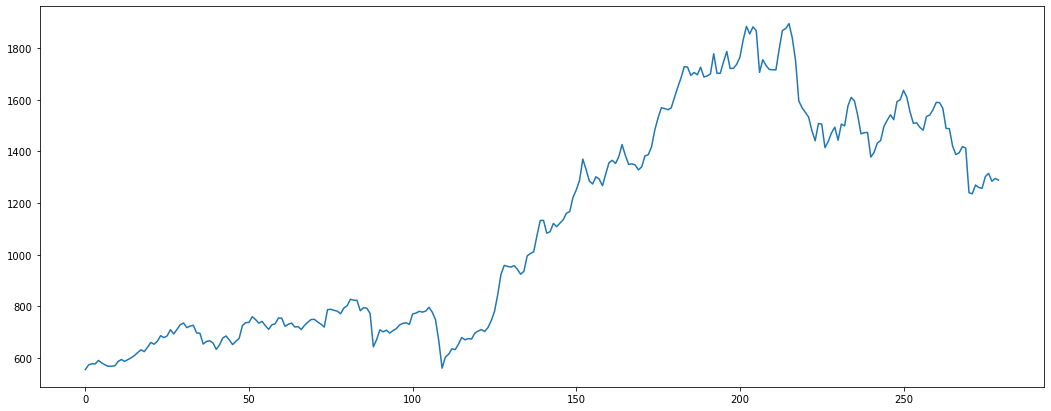

In [105]:
# we generated profit for period from 11.3.2018 to 25.6.2023.now we will compare our strategy profit with convntional
# buy and hold method

# plot a chart for tata motors for our testing period
plt1 = plt.figure(figsize=(18,7))
import matplotlib.pyplot as plt
plt.plot(df2['actual'])

In [106]:
# profit or loss made by conventional buy and hold method

#start period 
start_period = df['Close'][df.index == '2018-03-11']
start_period[0]

577.1400024414063

In [107]:
# end period 
end_period = df['Close'][df.index == '2023-06-25']
end_period[0]

1288.660009765625

In [108]:
# profit or loss for buy and hold

pnl_for_bah = end_period[0] - start_period[0]
pnl_for_bah

711.5200073242188

In [109]:
Total_pnl

551.91920674641

In [110]:
# now we calculate net profit on our strategy
# for simplicity we assume portfolio size of Rs.1,00,000/-

avg_share = np.round(100000/1288) #we have taken end or high value here for assumption
avg_share

78.0

### Net profit

In [112]:
# we are refering zerodha brokerage calculator here for brokerage and tax calculation.link:https://zerodha.com/brokerage-calculator/#tab-equities
# net profir made by buy and hold method

#total tax and charges for one complete transaction calculated from zerodha website:https://zerodha.com/brokerage-calculator/#tab-equities
Total_tax_and_charges = 173

net_buy_hold_profit = (pnl_for_bah *78)-Total_tax_and_charges
net_buy_hold_profit

55325.56057128907

In [114]:
# net profir made by AI based strategy

net_profit = (Total_pnl*78) - (Total_tax_and_charges* len(sell_count)) # or buy_count.both are same as we consider whole one complete transaction
net_profit 

37513.698126219984